In [1]:
import pandas as pd

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [2]:
import numpy as np

In [3]:
df = pd.read_csv("/Users/nipunbatra/Downloads/recs2009_public.csv")

In [4]:
df.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
0,1,2,4,12,2,2471.679705,4742,1080,4953,1271,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,2,4,10,26,2,8599.172010,2662,199,2688,143,...,0,1,1,0,-2,-2,-2,-2,-2,-2
2,3,1,1,1,5,8969.915921,6233,505,5741,829,...,0,3,5,3,-2,-2,-2,-2,-2,-2
3,4,2,3,7,2,18003.639600,6034,672,5781,868,...,3,3,5,3,-2,-2,-2,-2,-2,-2
4,5,1,1,1,3,5999.605242,5388,702,5313,797,...,0,1,1,0,-2,-2,-2,-2,-2,-2


In [10]:
%matplotlib inline

In [30]:
state_mapping = {'Virginia':13, 'Texas':21,'California':26}
appliance_map = {'Total':'KWH','Fridge':'KWHRFG','HEATING':'KWHSPH','COOLING':'KWHCOL','OTHERS':'KWHOTH'}


In [31]:
out = {}
for state_name, state_code in state_mapping.iteritems():
    temp = {}
    state_data = df[df['REPORTABLE_DOMAIN']==state_code]
    for appliance, appliance_key in appliance_map.iteritems():
        temp[appliance] = state_data.NWEIGHT*state_data[appliance_key]
    out[state_name] = (pd.DataFrame(temp).sum()/pd.DataFrame(temp).sum()['Total']).head(4)
    
    

In [32]:
pd.DataFrame(out)

,California,Texas,Virginia
COOLING,0.105420,0.287332,0.149039
Fridge,0.154330,0.092031,0.095993
HEATING,0.058208,0.075822,0.145869
OTHERS,0.651634,0.459546,0.494846


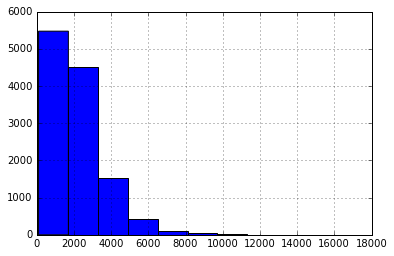

In [35]:
df.TOTSQFT.hist()

In [21]:
pd.DataFrame(out).sum()/pd.DataFrame(out).sum()['Total']

COOLING    0.149039
Fridge     0.095993
HEATING    0.145869
OTHERS     0.494846
Total      1.000000
dtype: float64

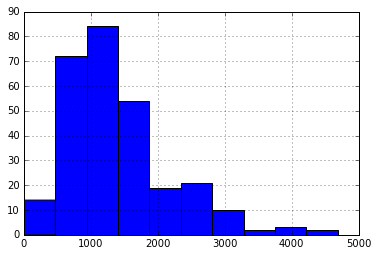

In [14]:
df[df.REPORTABLE_DOMAIN==13]['KWHRFG'].hist()